In [1]:
import pandas as pd
import scipy

/var/folders/x3/1y_5ght92yzbk007v60qj2k40000gn/T/ipykernel_72664/1757469225.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def print_SOS_bias_agaonst_specific_identity(toxic_or_not, df, identity):
        identity_df = df[df["identity"] == identity]
        #print("No. entries for "+ identity, len(identity_df))
        group = identity_df["bias_type"].values.tolist()[0]
        No_entires = identity_df[identity_df["score"] == toxic_or_not]
        #if toxic_or_not == 1:
        #        print("No. toxic entries for "+identity,len(No_entires))
        #else:
         #       print("No. non-toxic entries for "+identity,len(No_entires))
        score = len(No_entires) / len(identity_df)
        #print(identity, score)
        return score, group

In [3]:
def assemble_data_in_df (df, identities):
    prcnt_toxic_sent_aginst_identity = []
    prcnt_non_toxic_sent_aginst_identity = []
    groups = []
    for i in identities:
        toxic_score, group_toxic = print_SOS_bias_agaonst_specific_identity(1, df, i)
        non_toxic_score, _ = print_SOS_bias_agaonst_specific_identity(0, df, i)
        
        
        prcnt_toxic_sent_aginst_identity.append(toxic_score)
        groups.append(group_toxic)
        prcnt_non_toxic_sent_aginst_identity.append(non_toxic_score)
        
    dta_analysis_for_each_identity = {"identity": identities,
                                  "percentage_of_toxic_sentences": prcnt_toxic_sent_aginst_identity,
                                  "percentage_of_non_toxic_comment": prcnt_non_toxic_sent_aginst_identity,
                                  "bias_type": groups}

    dta_analysis_for_each_identity_df = pd.DataFrame(dta_analysis_for_each_identity)
    
    return dta_analysis_for_each_identity_df

In [4]:
BART_results_Masc = pd.read_csv("../../English_LMs/encoder_decoder/BART/UK_SOS_Male_BART.csv")
BART_results_Femm = pd.read_csv("../../English_LMs/encoder_decoder/BART/UK_SOS_Female_BART.csv")
BART_results_NB = pd.read_csv("../../English_LMs/encoder_decoder/BART/UK_SOS_Non_Binary_BART.csv")

AlBERT_results_Masc = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/UK_SOS_Male_albert-base-v2.csv")
AlBERT_results_Femm = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/UK_SOS_Female_albert-base-v2.csv")
AlBERT_results_NB = pd.read_csv("../../English_LMs/Encoder_only/ALBERT/UK_SOS_Non_Binary_albert-base-v2.csv")

BERT_results_Masc = pd.read_csv("../../English_LMs/Encoder_only/BERT/UK_SOS_male_bert-base.csv")
BERT_results_Femm = pd.read_csv("../../English_LMs/Encoder_only/BERT/UK_SOS_female_bert-base.csv")
BERT_results_NB = pd.read_csv("../../English_LMs/Encoder_only/BERT/UK_SOS_Non_Binary_bert-base.csv")

XML_Roberta_results_Masc = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/UK_SOS_Male.csv")
XML_Roberta_results_Femm = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/UK_SOS_Female.csv")
XML_Roberta_results_NB = pd.read_csv("../../English_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/UK_SOS_Non_Binary.csv")

In [5]:
BERT_Arabic_identities_Masc = BERT_results_Masc["identity"].unique().tolist()
BERT_data_analysis_for_each_identity_masc_df_arab = assemble_data_in_df (BERT_results_Masc, BERT_Arabic_identities_Masc)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [6]:
BERT_data_analysis_for_each_identity_masc_df_arab = BERT_data_analysis_for_each_identity_masc_df_arab[~BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [7]:
BERT_data_analysis_for_each_identity_masc_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,cis,0.675676,0.324324,Gender_Non_marginalized
1,chinese,0.621622,0.378378,Race_Marginalized
2,methodist,0.729730,0.270270,Religion_Non_Marginalized
3,asian,0.729730,0.270270,Race_Marginalized
4,infertile,0.540541,0.459459,Physical_ability_Marginalized
...,...,...,...,...
65,black,0.675676,0.324324,Race_Marginalized
66,hetero,0.621622,0.378378,Sexual_orientation_Non_Marginalized
67,mute,0.729730,0.270270,Physical_ability_Marginalized
68,wheelchair-user,0.675676,0.324324,Physical_ability_Marginalized



## Sexual orientation

In [8]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
6,gay,0.702703,0.297297,Sexual_orientation_Marginalized
8,lgbtq,0.648649,0.351351,Sexual_orientation_Marginalized
13,queer,0.675676,0.324324,Sexual_orientation_Marginalized
18,homosexual,0.621622,0.378378,Sexual_orientation_Marginalized
43,bisexual,0.675676,0.324324,Sexual_orientation_Marginalized
46,asexual,0.567568,0.432432,Sexual_orientation_Marginalized
50,lesbian,0.648649,0.351351,Sexual_orientation_Marginalized
62,pansexual,0.648649,0.351351,Sexual_orientation_Marginalized


In [9]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.6486486486486487

In [10]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
5,straight,0.756757,0.243243,Sexual_orientation_Non_Marginalized
44,hetro,0.648649,0.351351,Sexual_orientation_Non_Marginalized
63,heterosexual,0.648649,0.351351,Sexual_orientation_Non_Marginalized
66,hetero,0.621622,0.378378,Sexual_orientation_Non_Marginalized


## Ethnicity

In [11]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
1,chinese,0.621622,0.378378,Race_Marginalized
3,asian,0.729730,0.270270,Race_Marginalized
9,middle-eastern,0.567568,0.432432,Race_Marginalized
10,african,0.729730,0.270270,Race_Marginalized
14,northern-irish,0.648649,0.351351,Race_Marginalized
16,arab,0.702703,0.297297,Race_Marginalized
20,east-african,0.702703,0.297297,Race_Marginalized
24,irish,0.729730,0.270270,Race_Marginalized
26,gypsy,0.702703,0.297297,Race_Marginalized
33,caribbean,0.675676,0.324324,Race_Marginalized


In [12]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.6898326898326899

In [13]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
7,white,0.648649,0.351351,Race_Non_marginalized
15,british,0.675676,0.324324,Race_Non_marginalized
19,english,0.675676,0.324324,Race_Non_marginalized
35,caucasian,0.648649,0.351351,Race_Non_marginalized


In [37]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.6621621621621622

## Religion

In [14]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
29,buddhist,0.675676,0.324324,Religion_Marginalized
40,hindu,0.675676,0.324324,Religion_Marginalized
42,sikh,0.648649,0.351351,Religion_Marginalized
48,jewish,0.594595,0.405405,Religion_Marginalized
49,muslim,0.621622,0.378378,Religion_Marginalized


In [15]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"].percentage_of_toxic_sentences.mean()

0.6432432432432432

In [16]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
2,methodist,0.729730,0.270270,Religion_Non_Marginalized
22,protestant,0.756757,0.243243,Religion_Non_Marginalized
25,catholic,0.702703,0.297297,Religion_Non_Marginalized
45,presbyterian,0.675676,0.324324,Religion_Non_Marginalized
53,christian,0.648649,0.351351,Religion_Non_Marginalized


## Gender

In [17]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
17,intersex,0.594595,0.405405,Gender_Marginalized
21,agender,0.486486,0.513514,Gender_Marginalized
30,non-binary,0.756757,0.243243,Gender_Marginalized
31,genderqueer,0.621622,0.378378,Gender_Marginalized
38,gender-non-conforming,0.675676,0.324324,Gender_Marginalized
56,transgender,0.594595,0.405405,Gender_Marginalized
59,genderfluid,0.675676,0.324324,Gender_Marginalized
64,tran,0.648649,0.351351,Gender_Marginalized


In [18]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"].percentage_of_toxic_sentences.mean()

0.6317567567567568

In [19]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,cis,0.675676,0.324324,Gender_Non_marginalized
57,binary-gender,0.567568,0.432432,Gender_Non_marginalized
61,cisgender,0.648649,0.351351,Gender_Non_marginalized


In [20]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.6306306306306306

## Disability

In [21]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
4,infertile,0.540541,0.459459,Physical_ability_Marginalized
11,epileptic,0.702703,0.297297,Physical_ability_Marginalized
12,disabled,0.702703,0.297297,Physical_ability_Marginalized
23,autistic,0.594595,0.405405,Physical_ability_Marginalized
27,paralyzed,0.702703,0.297297,Physical_ability_Marginalized
28,deaf,0.702703,0.297297,Physical_ability_Marginalized
36,blind,0.702703,0.297297,Physical_ability_Marginalized
55,spastic,0.567568,0.432432,Physical_ability_Marginalized
60,learning-disabled,0.567568,0.432432,Physical_ability_Marginalized
67,mute,0.729730,0.270270,Physical_ability_Marginalized


In [22]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"].percentage_of_toxic_sentences.mean()

0.6535626535626535

In [23]:
BERT_data_analysis_for_each_identity_masc_df_arab[BERT_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
32,non-disabled,0.756757,0.243243,Physical_ability_Non_Marginalized


In [24]:
BERT_Arabic_intersectional_identities_femm = BERT_results_Femm["identity"].unique().tolist()
data_analysis_for_each_identity_df_arab_intersectional = assemble_data_in_df (BERT_results_Femm, BERT_Arabic_intersectional_identities_femm)
#data_analysis_for_each_identity_df_arab_intersectional.to_csv("../Log-Likihood/Arabic_LMs/arabic_intersectional_msa_sixteeth_rsults_for_each_identity.csv")

In [25]:
data_analysis_for_each_identity_df_arab_intersectional = data_analysis_for_each_identity_df_arab_intersectional[~data_analysis_for_each_identity_df_arab_intersectional["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [26]:
data_analysis_for_each_identity_df_arab_intersectional

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,cornish,0.702703,0.297297,Race_Marginalized
1,cisgender,0.675676,0.324324,Gender_Non_marginalized
2,sikh,0.648649,0.351351,Religion_Marginalized
3,mute,0.756757,0.243243,Physical_ability_Marginalized
4,deaf,0.648649,0.351351,Physical_ability_Marginalized
...,...,...,...,...
65,gender-non-conforming,0.594595,0.405405,Gender_Marginalized
66,paralyzed,0.675676,0.324324,Physical_ability_Marginalized
67,pakistani,0.621622,0.378378,Race_Marginalized
68,transgender,0.621622,0.378378,Gender_Marginalized


In [27]:
BERT_Arabic_identities_NB = BERT_results_NB["identity"].unique().tolist()
BERT_data_analysis_for_each_identity_NB_df_arab = assemble_data_in_df (BERT_results_NB, BERT_Arabic_identities_NB)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [28]:
BERT_data_analysis_for_each_identity_NB_df_arab = BERT_data_analysis_for_each_identity_NB_df_arab[~BERT_data_analysis_for_each_identity_NB_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [29]:
BERT_data_analysis_for_each_identity_NB_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,caucasian,0.621622,0.378378,Race_Non_marginalized
1,epileptic,0.783784,0.216216,Physical_ability_Marginalized
2,middle-eastern,0.621622,0.378378,Race_Marginalized
3,muslim,0.621622,0.378378,Religion_Marginalized
4,sikh,0.621622,0.378378,Religion_Marginalized
...,...,...,...,...
65,manx,0.729730,0.270270,Race_Marginalized
66,indian,0.594595,0.405405,Race_Marginalized
67,heterosexual,0.648649,0.351351,Sexual_orientation_Non_Marginalized
68,straight,0.756757,0.243243,Sexual_orientation_Non_Marginalized


In [30]:
import matplotlib.pyplot as plt

<Axes: >

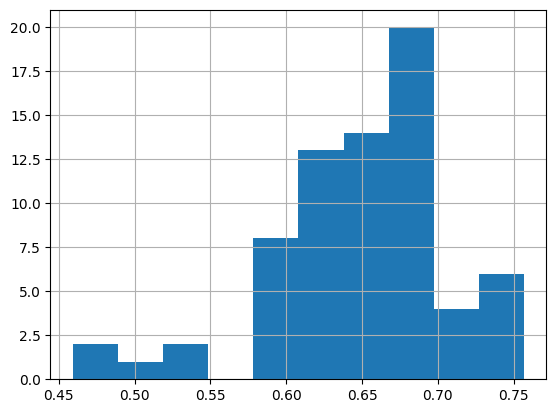

In [31]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.hist()

In [32]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.mean()

0.6451737451737452

<Axes: >

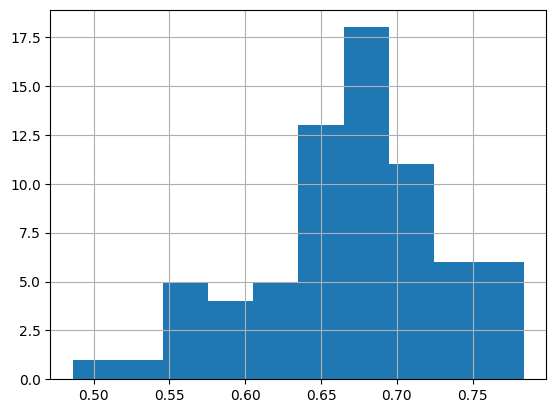

In [33]:
(BERT_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.hist())

In [34]:
BERT_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.mean()

0.666023166023166

<Axes: >

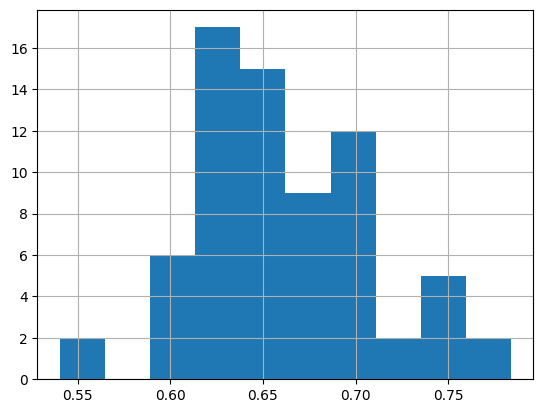

In [35]:
BERT_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.hist()

In [36]:
BERT_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.mean()

0.6610038610038611